In [1]:
import numpy as np
import math
import random
import os
import torch
import scipy.spatial.distance
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import plotly.graph_objects as go
import plotly.express as px

##
import sys
sys.path.append(r"C:\Users\user\OneDrive - personalmicrosoftsoftware.uci.edu\2020Spring\CS175\175PointCloud")
from utils.TDS_utils import read_off, PointSampler, Normalize
from utils.camutils import makerotation, Camera
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Get dataset

In [2]:
from path import Path

path = Path("../Data/ModelNet10")
folders = [dir for dir in sorted(os.listdir(path)) if os.path.isdir(path/dir)]
classes = {folder: i for i, folder in enumerate(folders)};
classes

{'bathtub': 0,
 'bed': 1,
 'chair': 2,
 'desk': 3,
 'dresser': 4,
 'monitor': 5,
 'night_stand': 6,
 'sofa': 7,
 'table': 8,
 'toilet': 9}

## sample 3d points

In [3]:
with open(path/"bed/train/bed_0001.off", 'r') as f:
    verts, faces = read_off(f)

In [4]:
# sample points to get (x,y,z) points
pointcloud = PointSampler(1000)((verts, faces))

In [5]:
# Then, range of x,y,z should be between -1 and 1
norm_pointcloud = Normalize()(pointcloud)

In [6]:
norm_pointcloud.shape

(1000, 3)

In [7]:
path = "../Data/ModelNet10"
def get_3d_points(file_name):
    with open(path+'/'+file_name, 'r') as f:
        verts, faces = read_off(f)
        pointcloud = PointSampler(1000)((verts, faces))
        norm_pointcloud = Normalize()(pointcloud)
        return norm_pointcloud.T

## take 2d photo

In [8]:
cam = Camera(f=25,c=np.array([[16,16]]).T,t=np.array([[0,2,0]]).T, R=makerotation(90,0,0))

In [9]:
# project 3d points to get 2d pointss
pts3 = norm_pointcloud.T
pts2 = cam.project(pts3)

In [10]:
def visual_2d(cam, pts3):
    pts2 = cam.project(pts3)
    
    plt.rcParams['figure.figsize']=[12,3]
    # visualize pts2 
    fig = plt.figure()
    ax = fig.add_subplot(1,4,1)
    ax.plot(pts2[0,:],pts2[1,:],'.', alpha = 0.3, ms = 5)
    ax.add_patch(patches.Rectangle((0,0),32,32,color='r',fill=False))
    plt.grid()
    plt.axis('square')
    plt.title('camera projection')

    # visualize cam 
    look = np.hstack((cam.t,cam.t+cam.R @ np.array([[0,0,0.5]]).T))
    # overhead view (xz-plane) showing points, camera
    # position, and direction camera is pointed
    ax = fig.add_subplot(1,4,2)
    ax.plot(pts3[0,:],pts3[2,:],'.')
    ax.plot(cam.t[0],cam.t[2],'ro')
    ax.plot(look[0,:],look[2,:],'r')
    plt.axis('equal')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('scene overhead view')

    # side view (yz-plane) showing points, camera
    # position, and direction camera is pointed
    ax = fig.add_subplot(1,4,3)
    ax.plot(pts3[2,:],pts3[1,:],'.')
    ax.plot(cam.t[2],cam.t[1],'ro')
    ax.plot(look[2,:],look[1,:],'r')
    plt.axis('equal')
    plt.grid()
    plt.xlabel('z')
    plt.ylabel('y')
    plt.title('scene side view')
    plt.tight_layout()
    
    # side view (xy-plane) showing points, camera
    # position, and direction camera is pointed
    ax = fig.add_subplot(1,4,4)
    ax.plot(pts3[0,:],pts3[1,:],'.')
    ax.plot(cam.t[0],cam.t[1],'ro')
    ax.plot(look[0,:],look[1,:],'r')
    plt.axis('equal')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('scene side view')
    plt.tight_layout()
    plt.show()

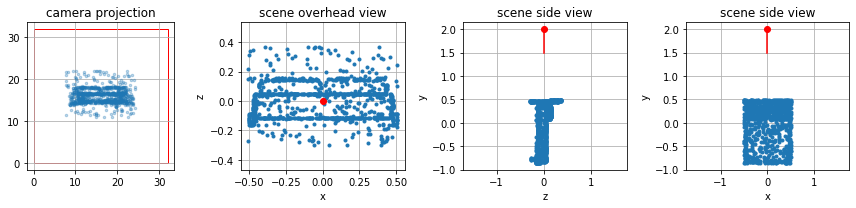

In [11]:
cam1 = Camera(f=25,c=np.array([[16,16]]).T,t=np.array([[0,2,0]]).T, R=makerotation(90,0,0))
visual_2d(cam1, pts3)

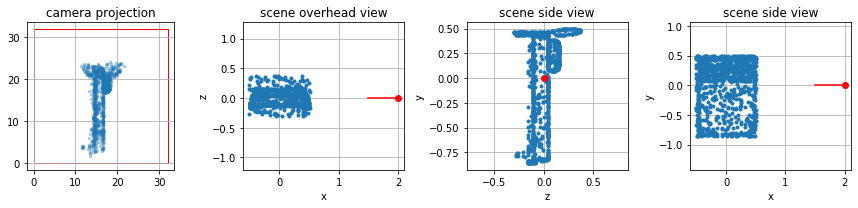

In [12]:
cam2 = Camera(f=25,c=np.array([[16,16]]).T,t=np.array([[2,0,0]]).T, R=makerotation(0,90,0))
visual_2d(cam2, pts3)

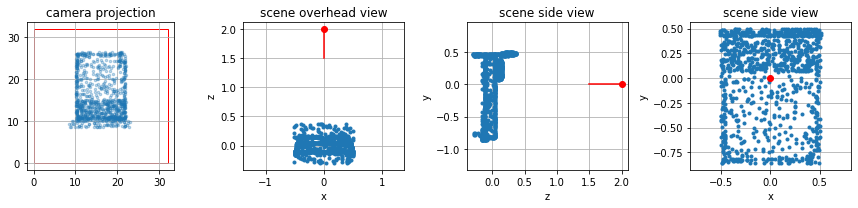

In [13]:
cam3 = Camera(f=25,c=np.array([[16,16]]).T,t=np.array([[0,0,2]]).T, R=makerotation(180,0,0))
visual_2d(cam3, pts3)

## Visualize more samples

bed/train/bed_0167.off


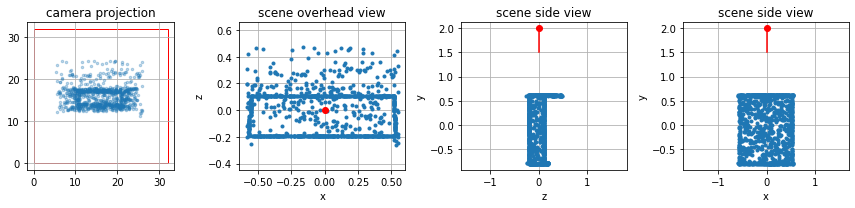

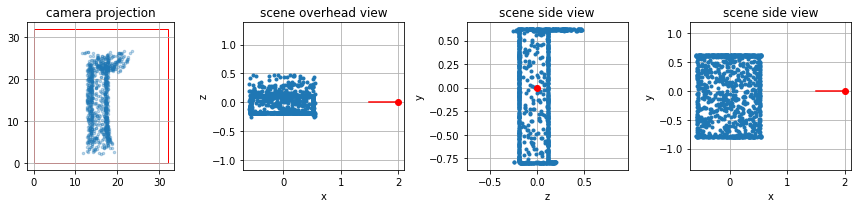

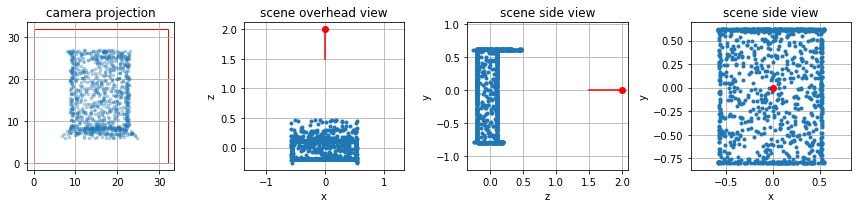

bed/train/bed_0123.off


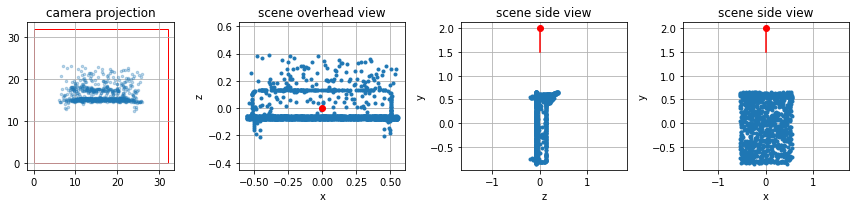

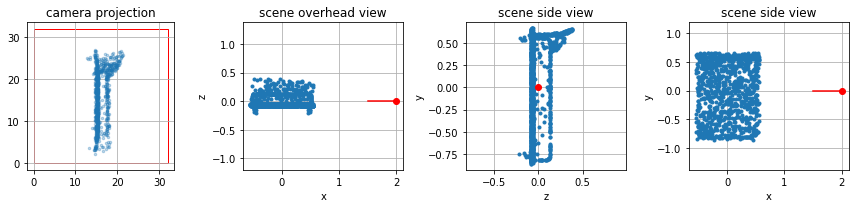

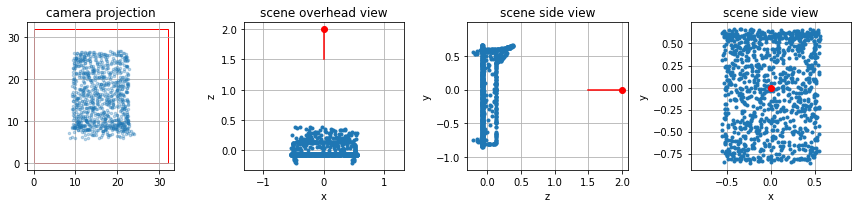

bed/train/bed_0488.off


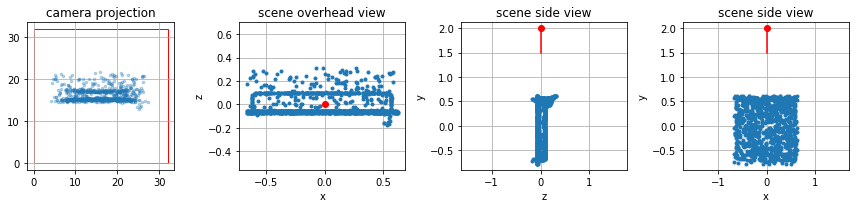

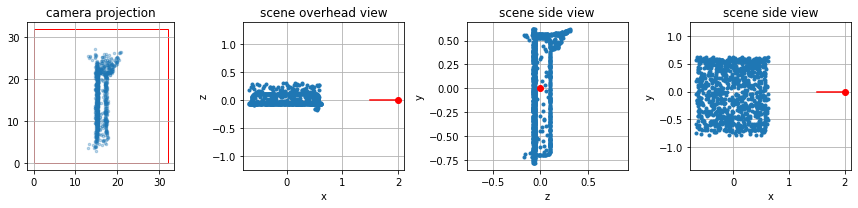

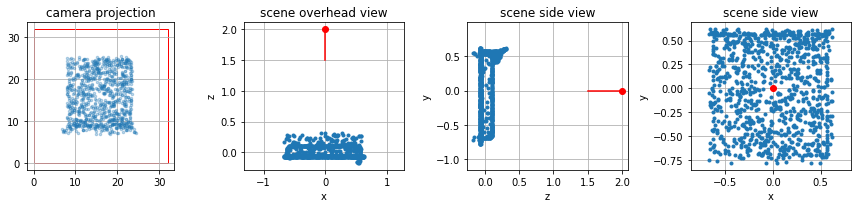

bed/train/bed_0417.off


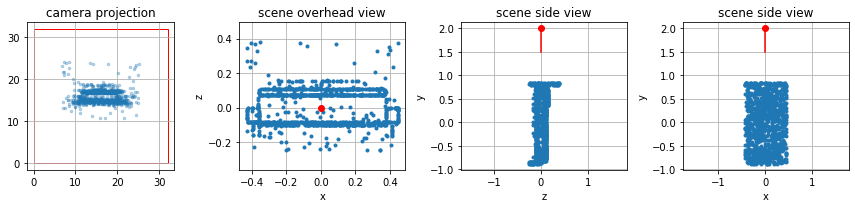

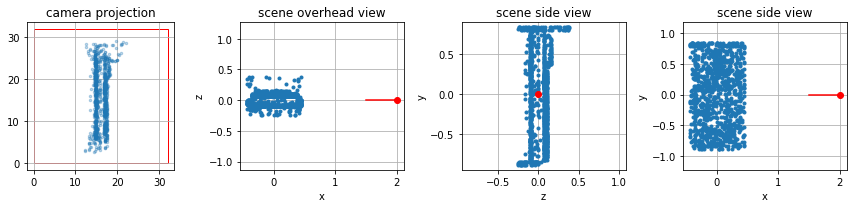

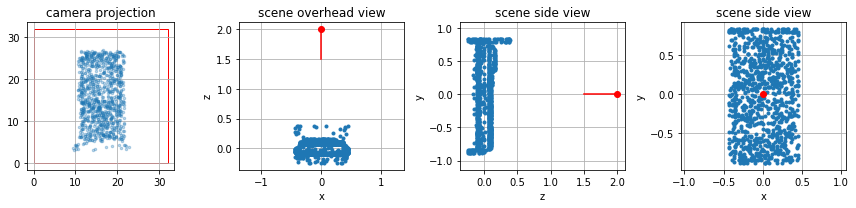

bed/train/bed_0494.off


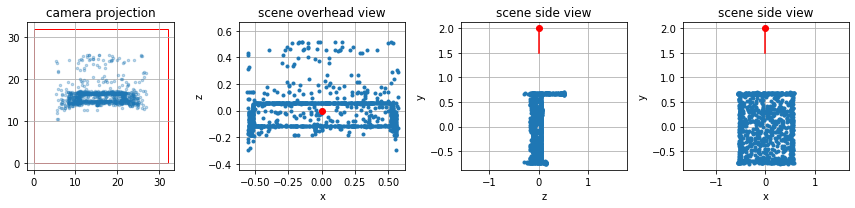

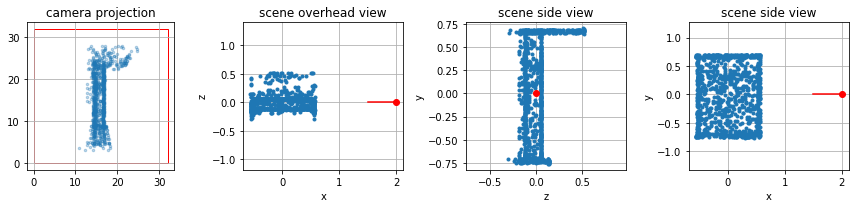

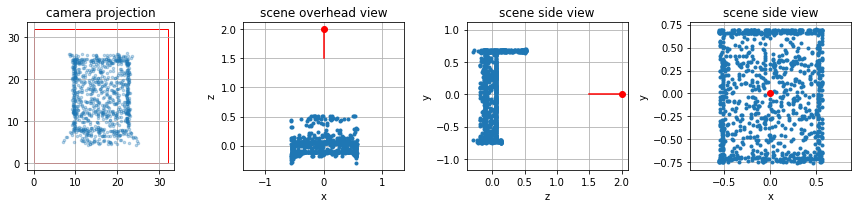

bed/train/bed_0128.off


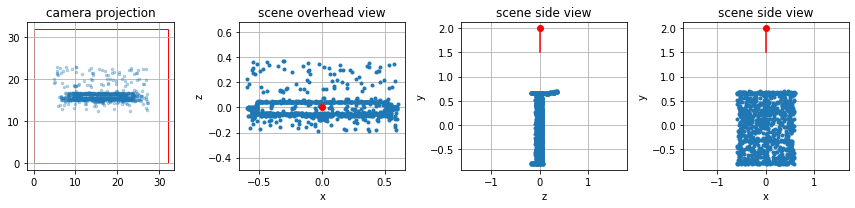

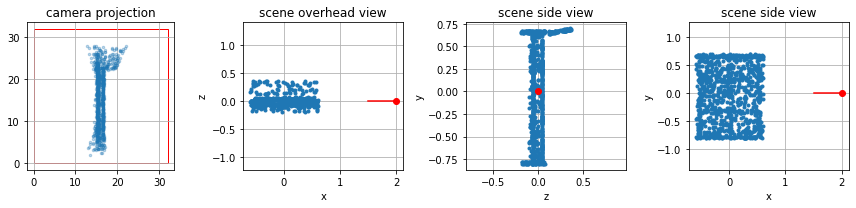

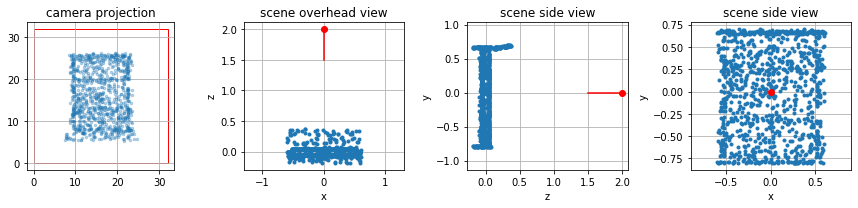

bed/train/bed_0504.off


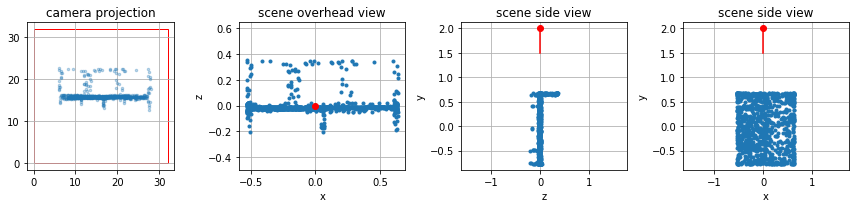

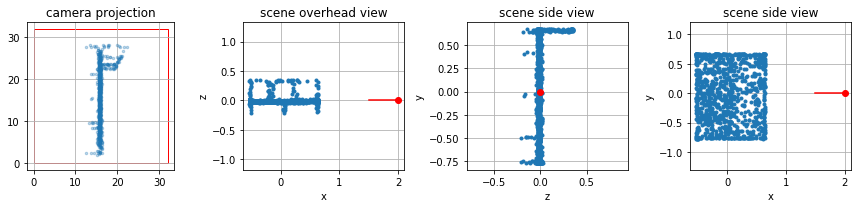

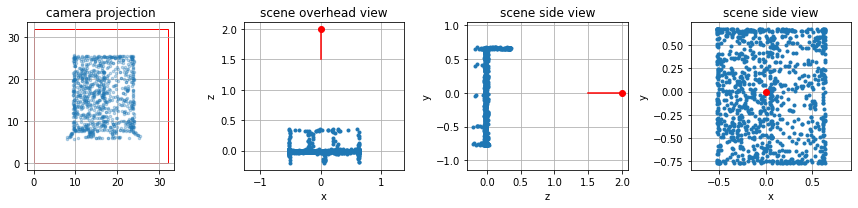

bed/train/bed_0375.off


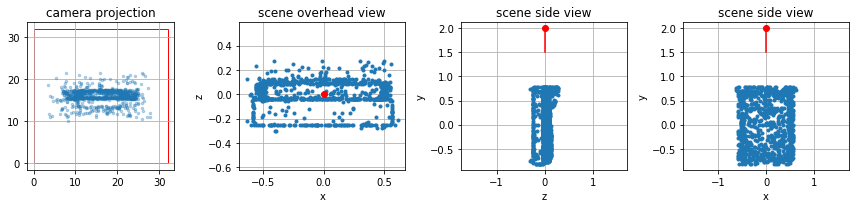

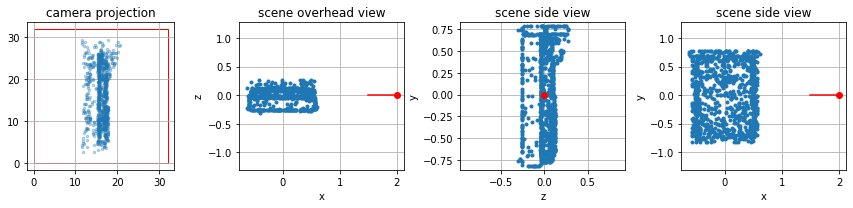

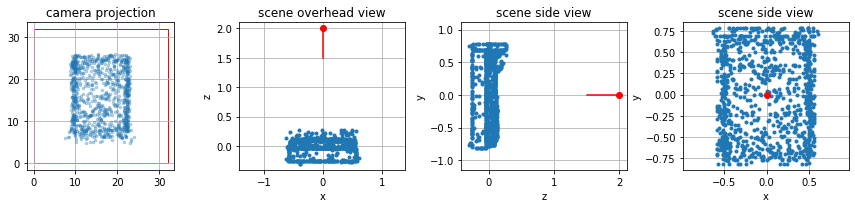

bed/train/bed_0061.off


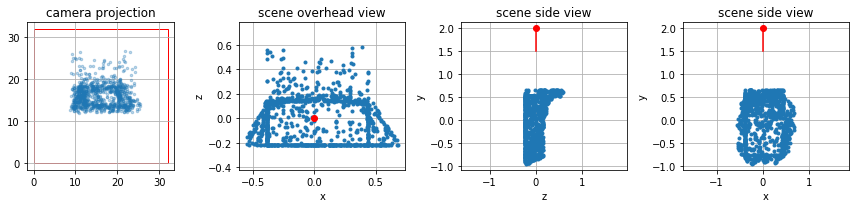

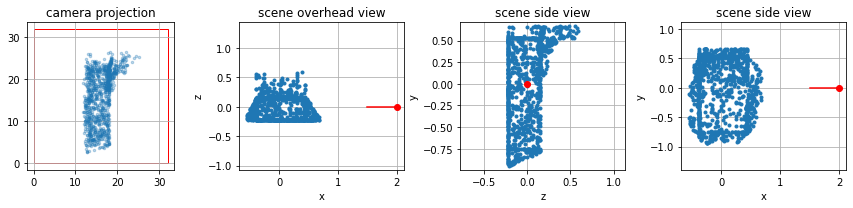

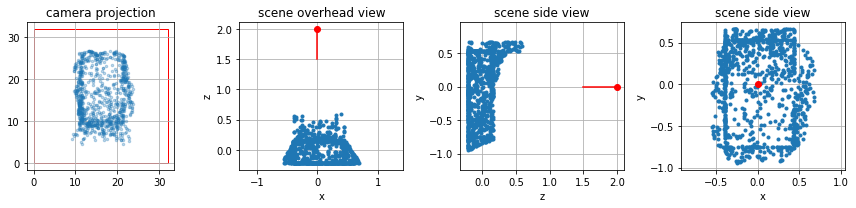

bed/train/bed_0459.off


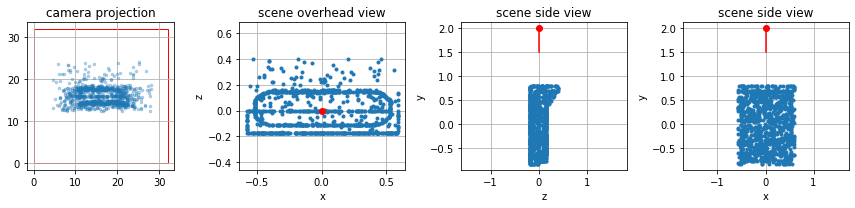

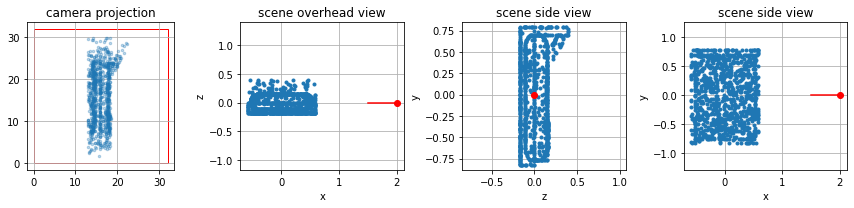

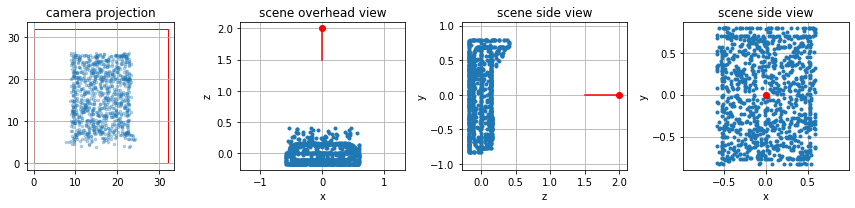

In [14]:
cam1 = Camera(f=25,c=np.array([[16,16]]).T,t=np.array([[0,2,0]]).T, R=makerotation(90,0,0))
cam2 = Camera(f=25,c=np.array([[16,16]]).T,t=np.array([[2,0,0]]).T, R=makerotation(0,90,0))
cam3 = Camera(f=25,c=np.array([[16,16]]).T,t=np.array([[0,0,2]]).T, R=makerotation(180,0,0))


for i in range(10):
    file_name = "bed/train/bed_" + str(np.random.randint(1,515)).zfill(4) + ".off"
    print(file_name)
    pts3 = get_3d_points(file_name)
    visual_2d(cam1, pts3)
    visual_2d(cam2, pts3)
    visual_2d(cam3, pts3)
    plt.show()

chair/train/chair_0049.off


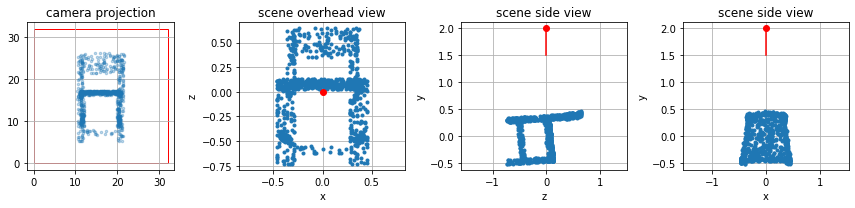

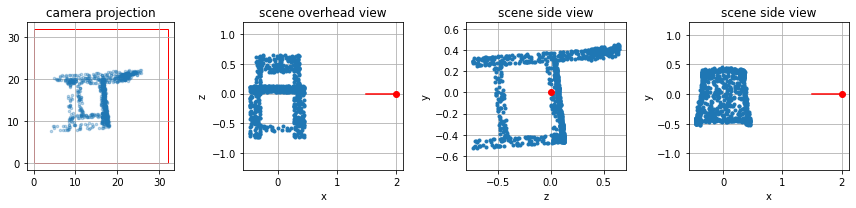

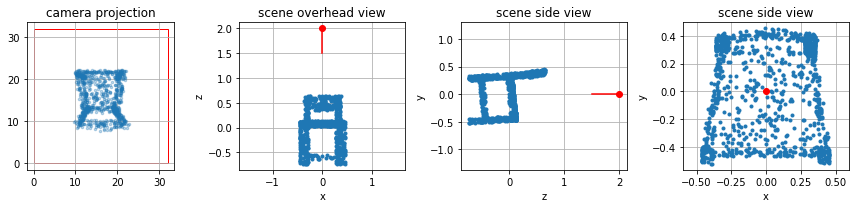

chair/train/chair_0650.off


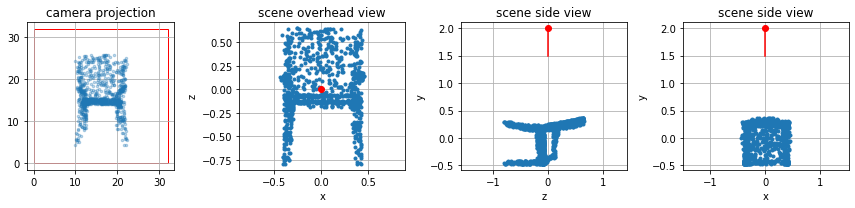

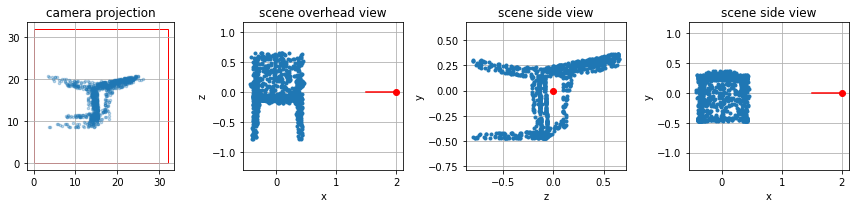

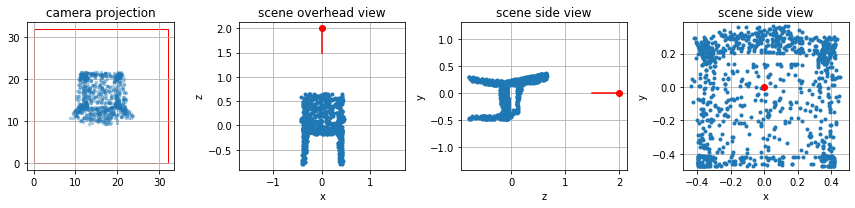

chair/train/chair_0655.off


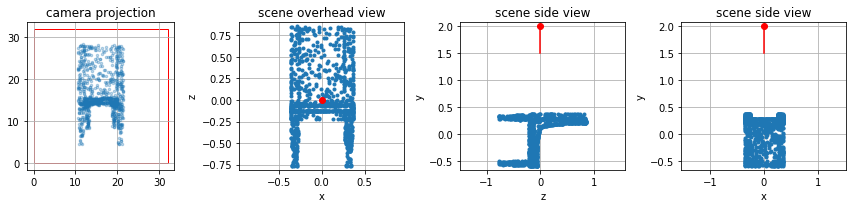

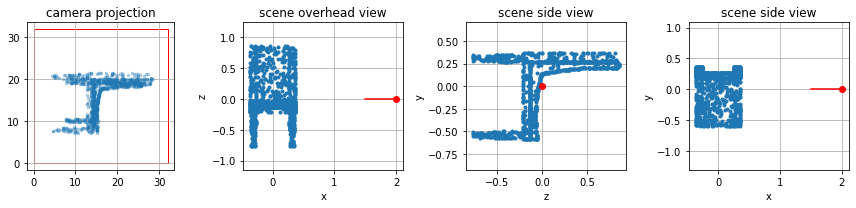

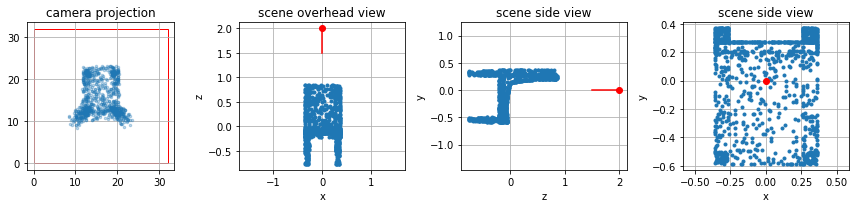

chair/train/chair_0121.off


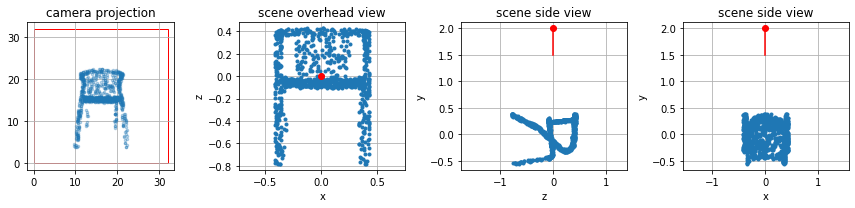

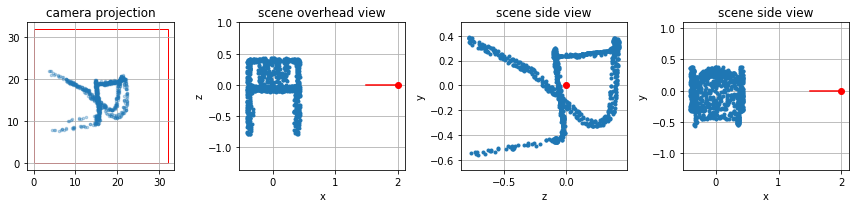

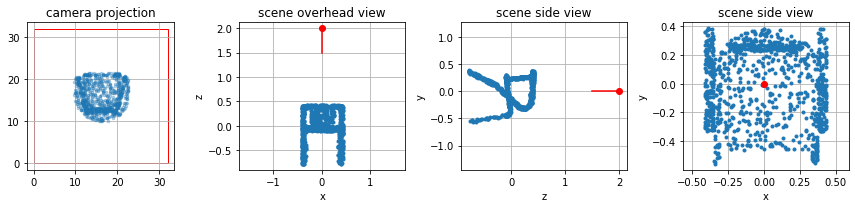

chair/train/chair_0686.off


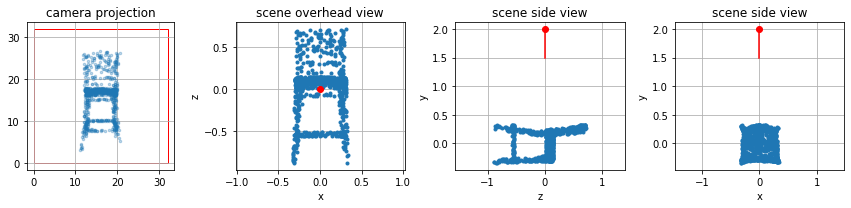

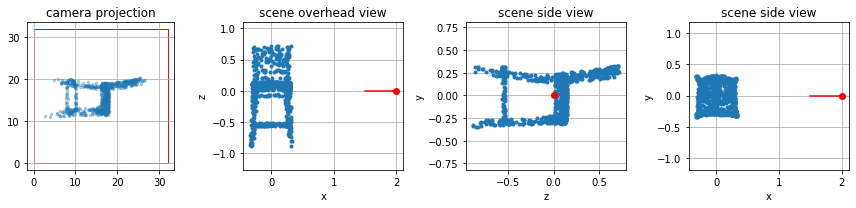

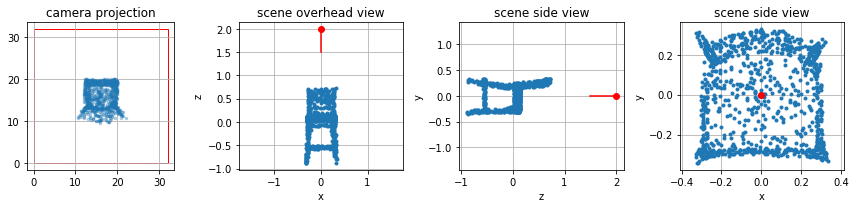

chair/train/chair_0103.off


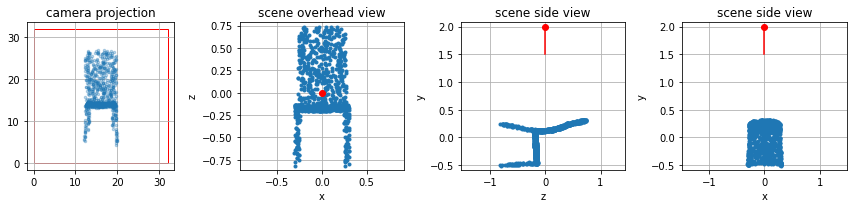

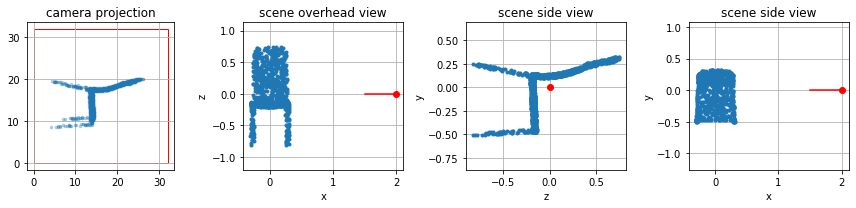

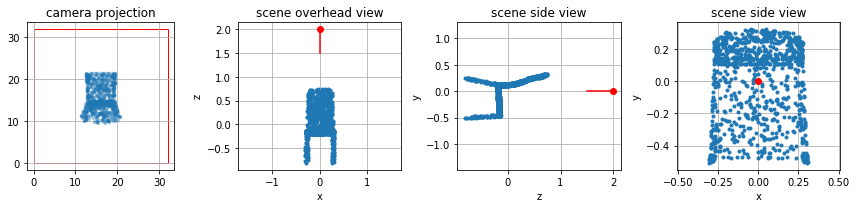

chair/train/chair_0347.off


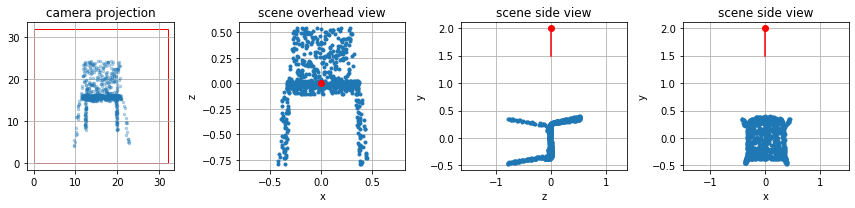

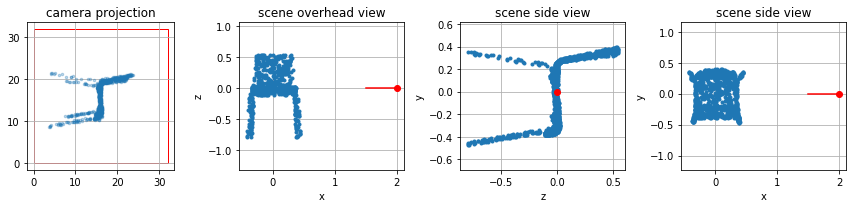

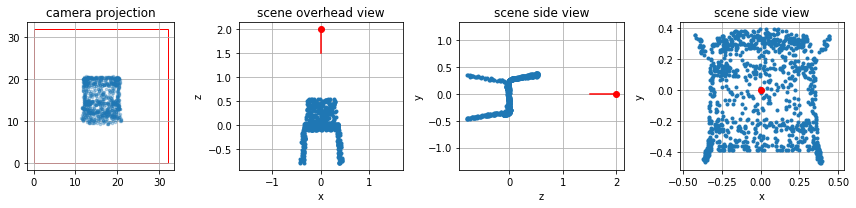

chair/train/chair_0566.off


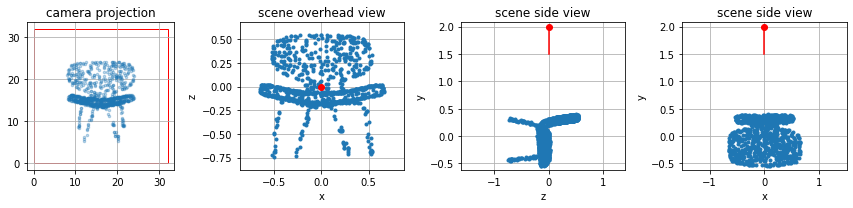

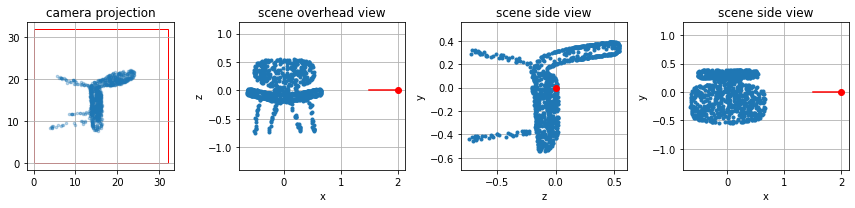

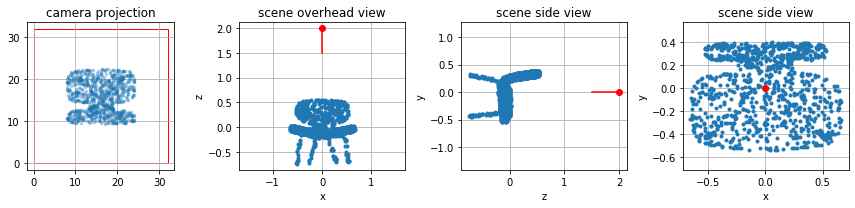

chair/train/chair_0351.off


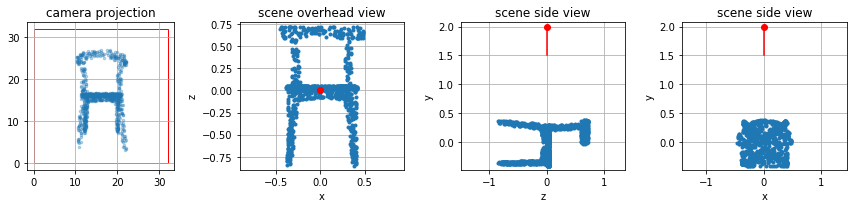

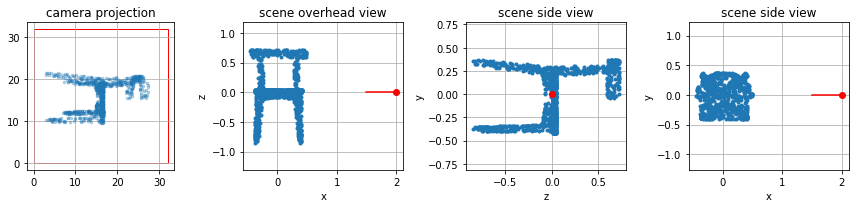

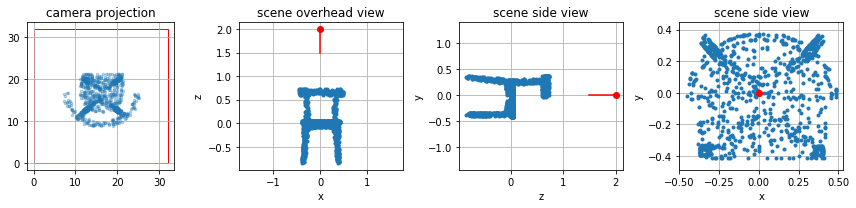

chair/train/chair_0602.off


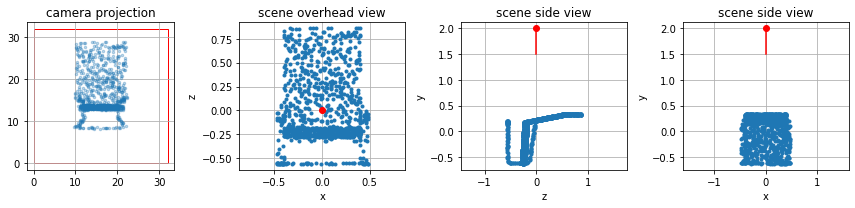

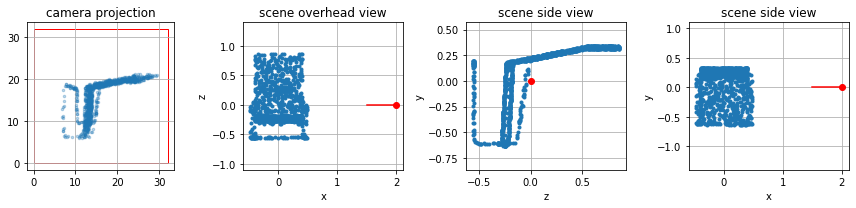

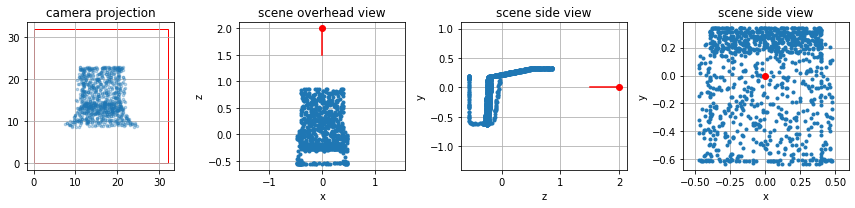

In [15]:
for i in range(10):
    file_name = "chair/train/chair_" + str(np.random.randint(1,889)).zfill(4) + ".off"
    print(file_name)
    pts3 = get_3d_points(file_name)
    visual_2d(cam1, pts3)
    visual_2d(cam2, pts3)
    visual_2d(cam3, pts3)
    plt.show()

## if need to augment data... adding noise

In [16]:
class RandRotation_z(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2

        theta = random.random() * 2. * math.pi
        rot_matrix = np.array([[ math.cos(theta), -math.sin(theta),    0],
                               [ math.sin(theta),  math.cos(theta),    0],
                               [0,                             0,      1]])
        
        rot_pointcloud = rot_matrix.dot(pointcloud.T).T
        return  rot_pointcloud
    
class RandomNoise(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2

        noise = np.random.normal(0, 0.02, (pointcloud.shape))
    
        noisy_pointcloud = pointcloud + noise
        return  noisy_pointcloud

In [17]:
path = "../Data/ModelNet10"
def get_3d_points_with_noise(file_name):
    with open(path+'/'+file_name, 'r') as f:
        verts, faces = read_off(f)
        pointcloud = PointSampler(1000)((verts, faces))
        norm_pointcloud = Normalize()(pointcloud)
        rot_pointcloud = RandRotation_z()(norm_pointcloud)
        noisy_rot_pointcloud = RandomNoise()(rot_pointcloud)
        return noisy_rot_pointcloud.T

bed/train/bed_0491.off


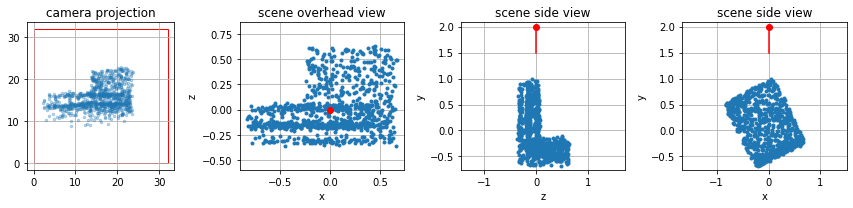

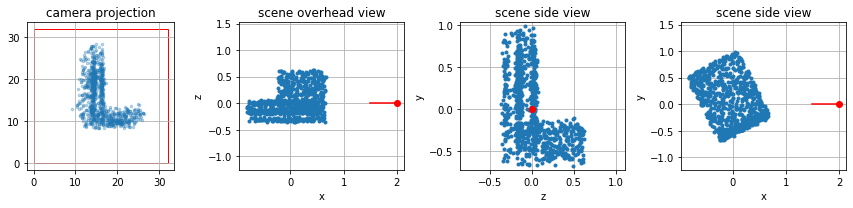

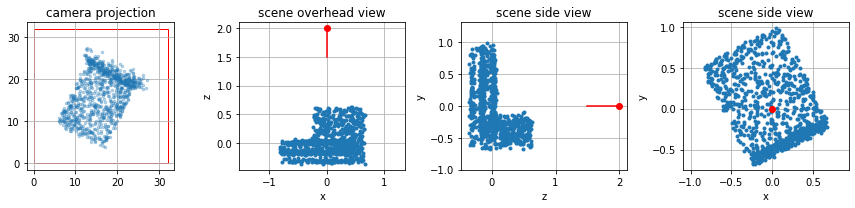

bed/train/bed_0317.off


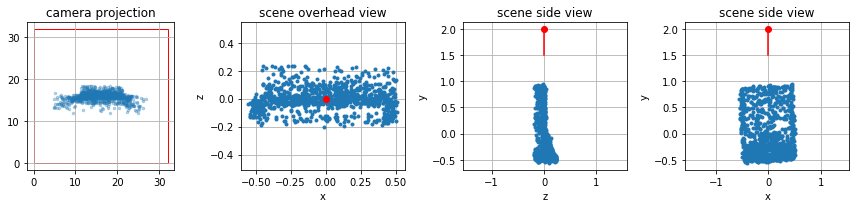

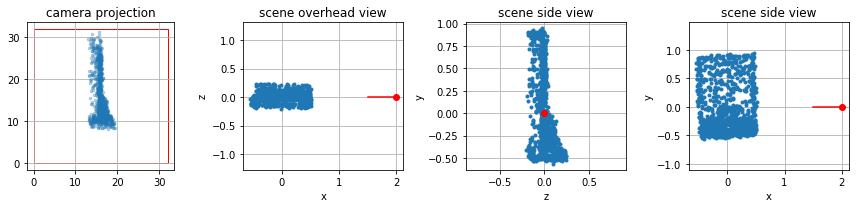

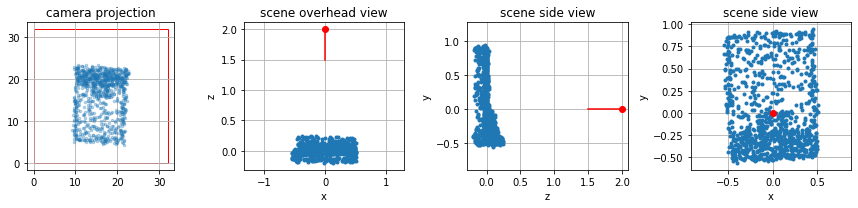

bed/train/bed_0013.off


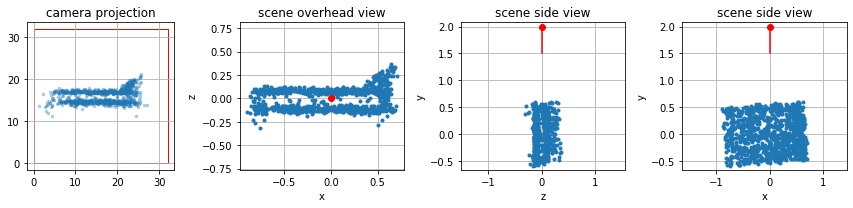

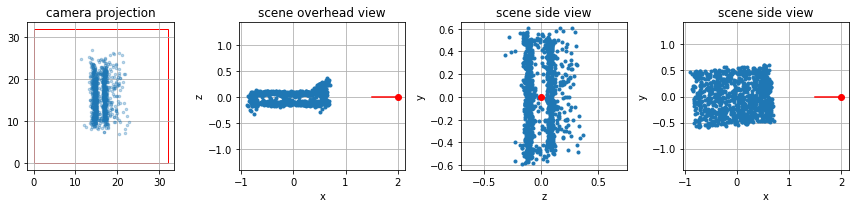

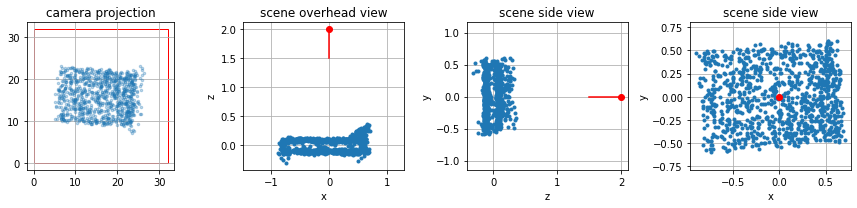

bed/train/bed_0349.off


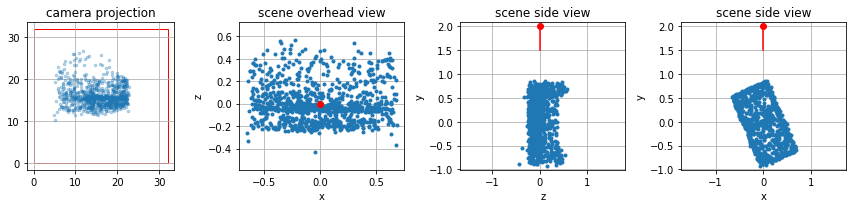

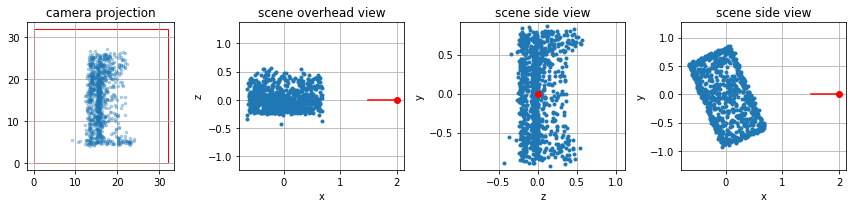

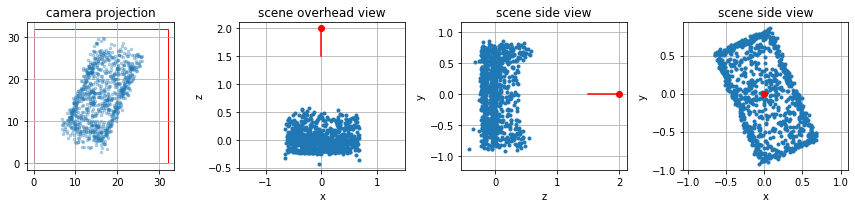

bed/train/bed_0417.off


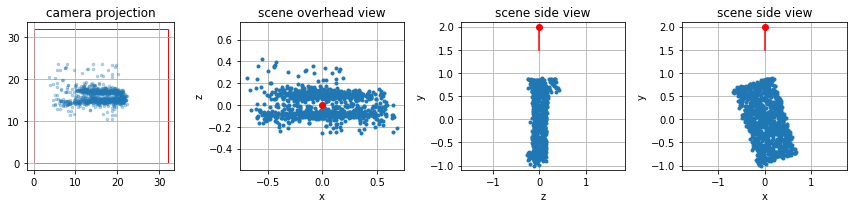

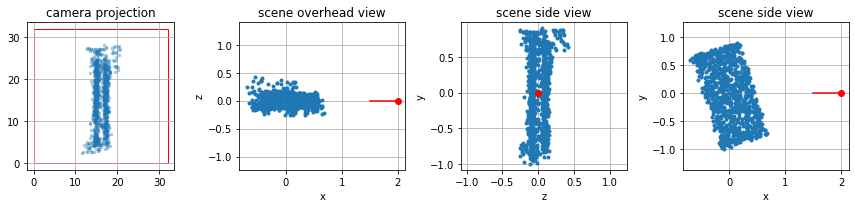

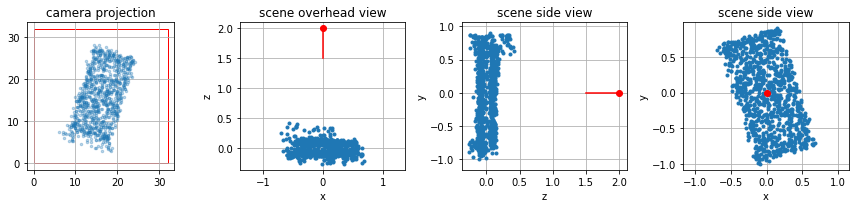

bed/train/bed_0391.off


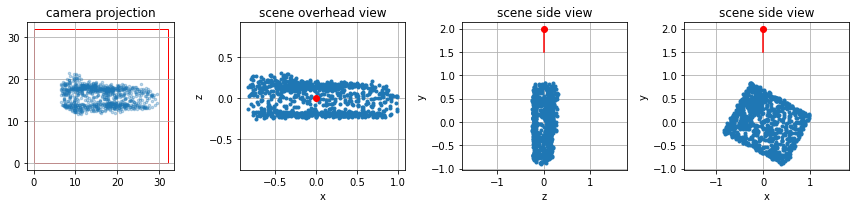

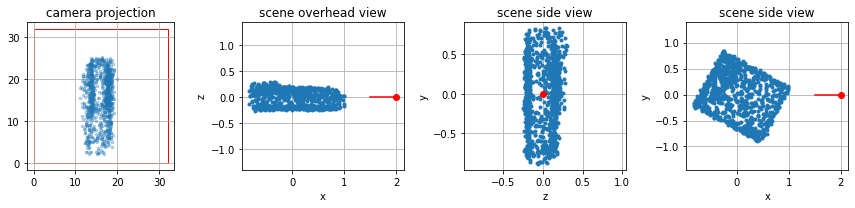

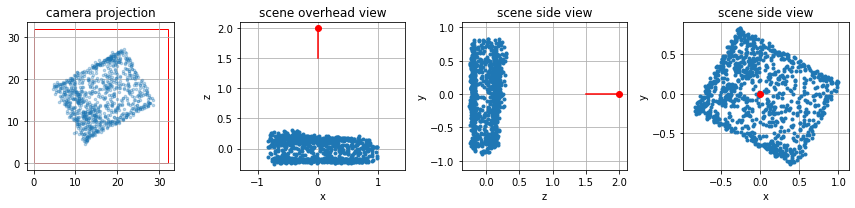

bed/train/bed_0241.off


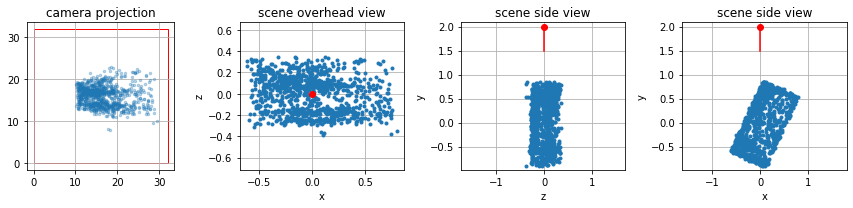

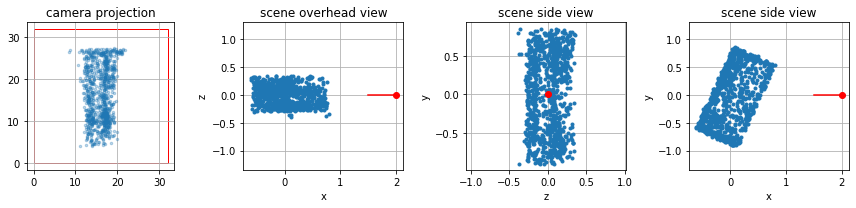

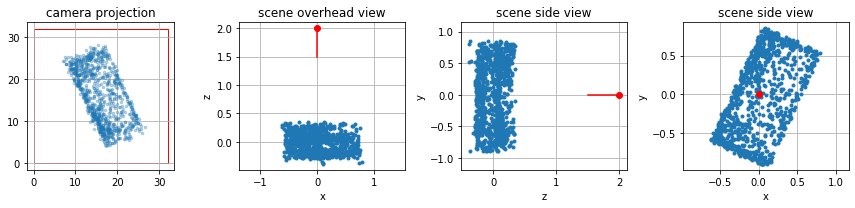

bed/train/bed_0311.off


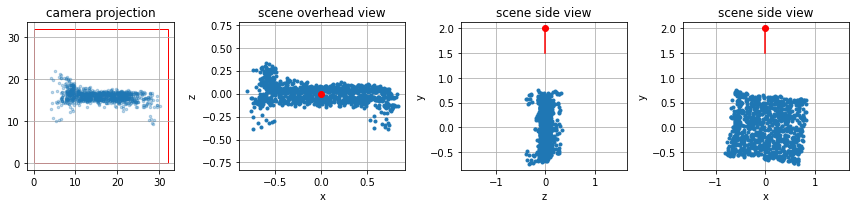

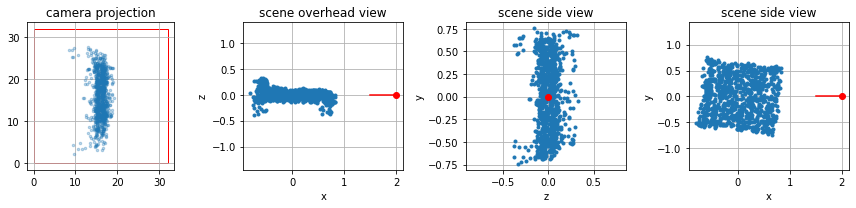

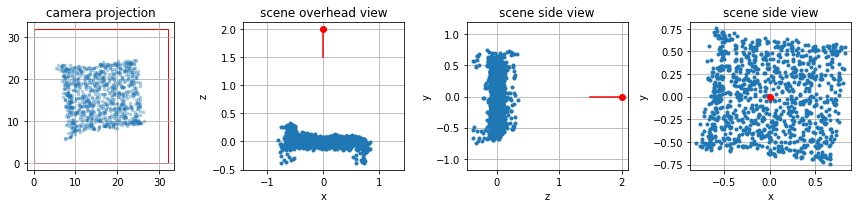

bed/train/bed_0220.off


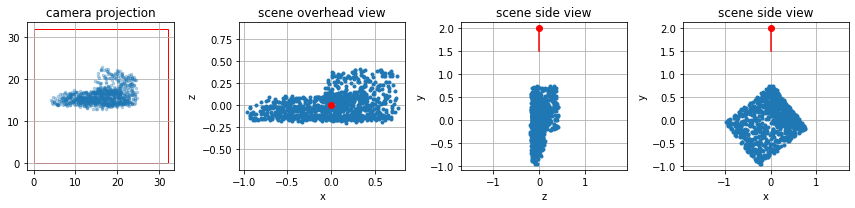

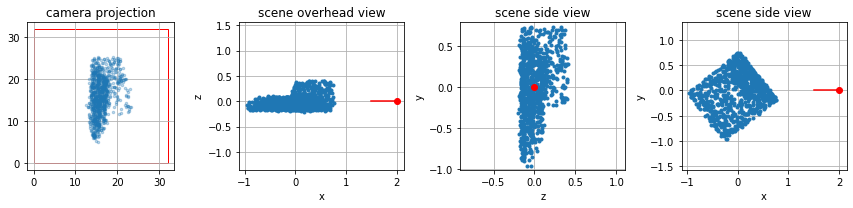

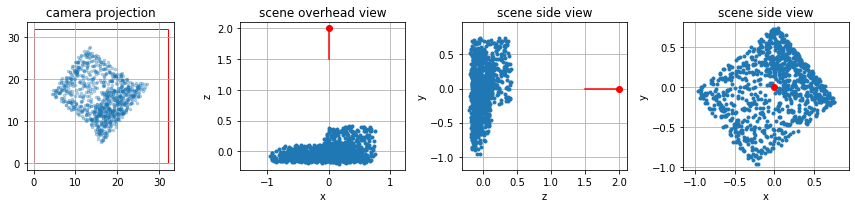

bed/train/bed_0369.off


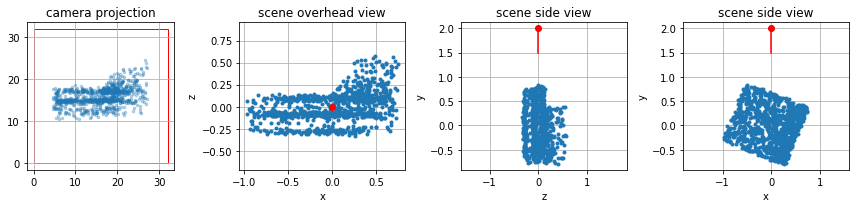

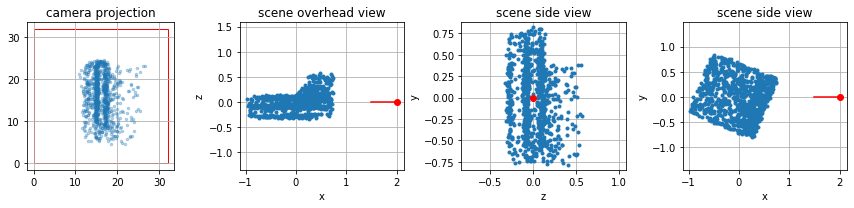

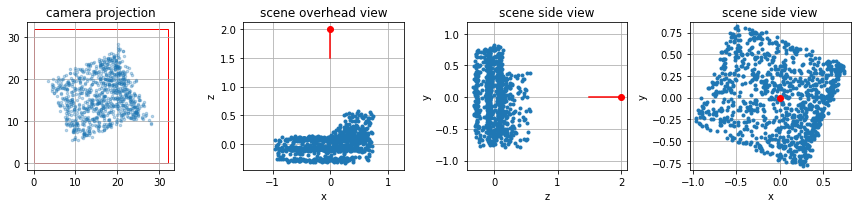

In [18]:
for i in range(10):
    file_name = "bed/train/bed_" + str(np.random.randint(1,515)).zfill(4) + ".off"
    print(file_name)
    pts3 = get_3d_points_with_noise(file_name)
    visual_2d(cam1, pts3)
    visual_2d(cam2, pts3)
    visual_2d(cam3, pts3)
    plt.show()

chair/train/chair_0695.off


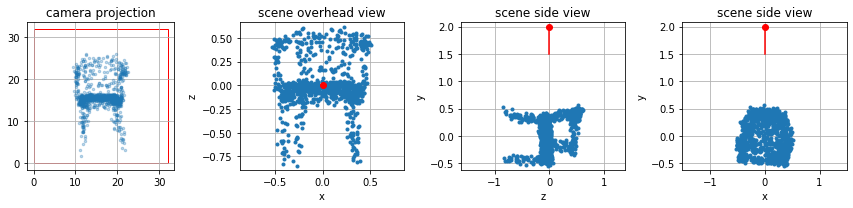

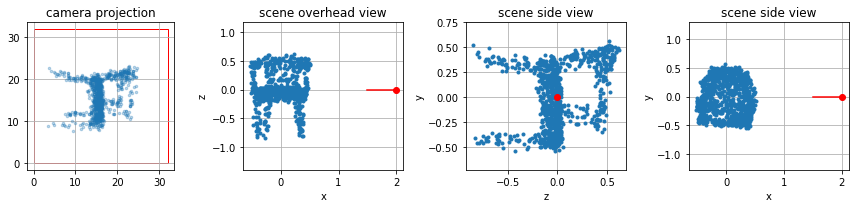

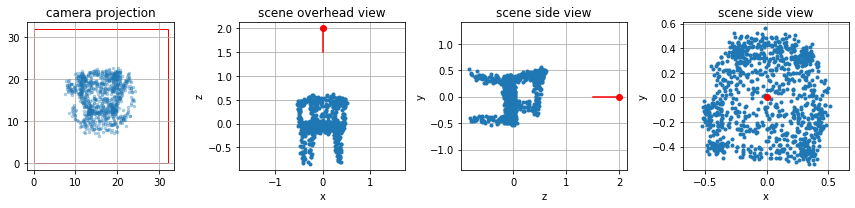

chair/train/chair_0853.off


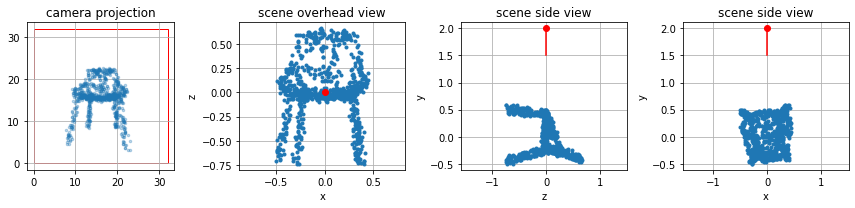

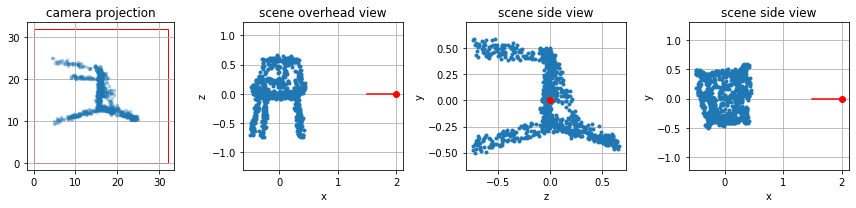

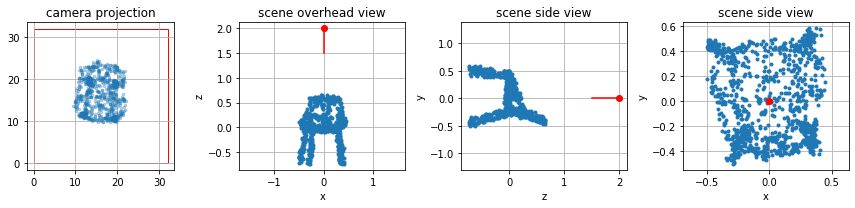

chair/train/chair_0729.off


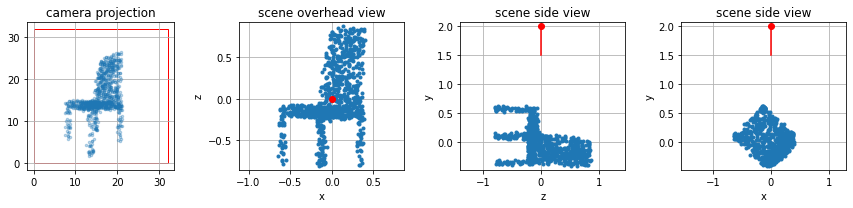

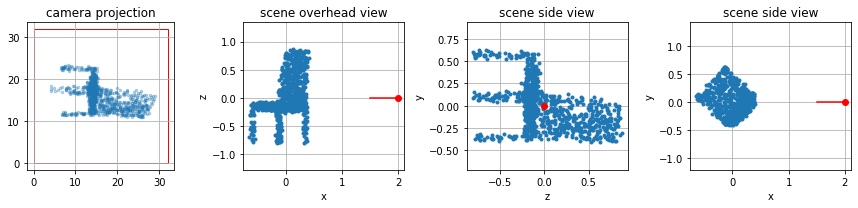

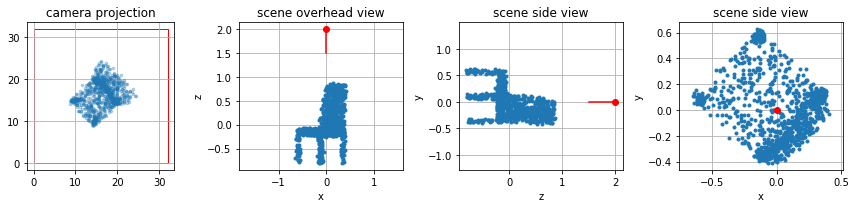

chair/train/chair_0576.off


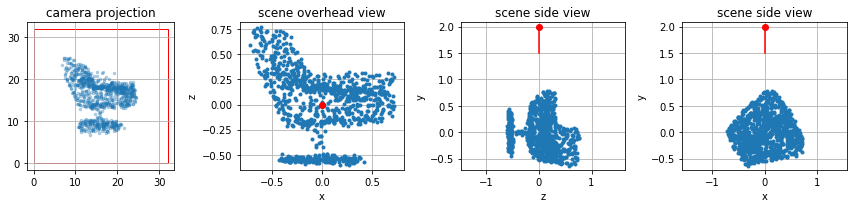

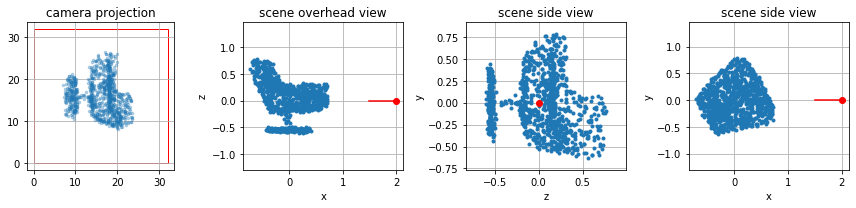

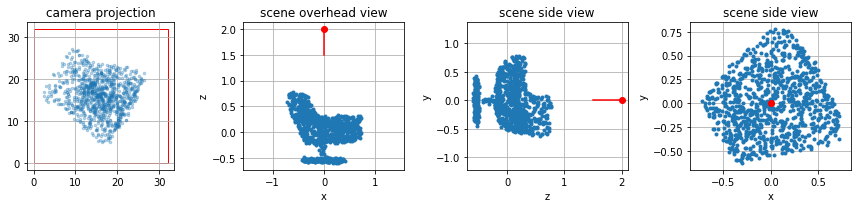

chair/train/chair_0035.off


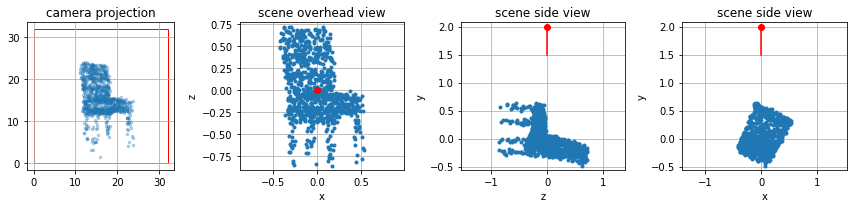

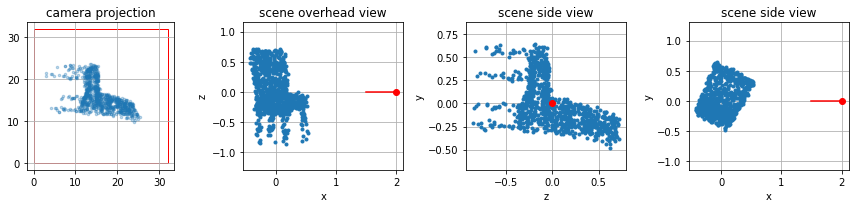

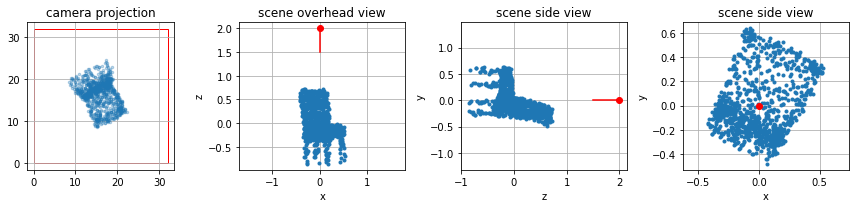

chair/train/chair_0299.off


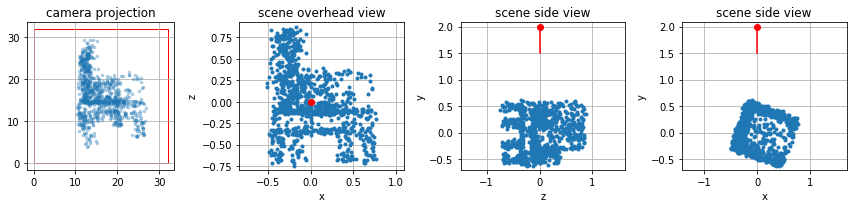

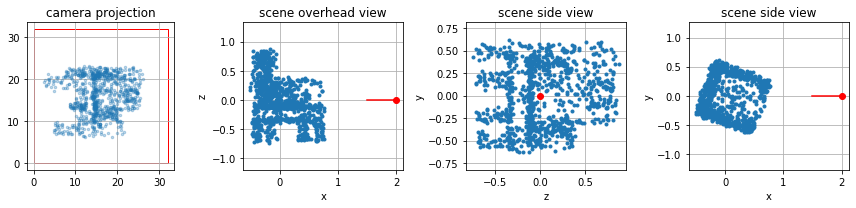

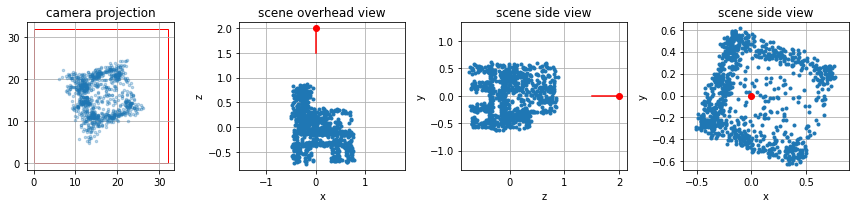

chair/train/chair_0852.off


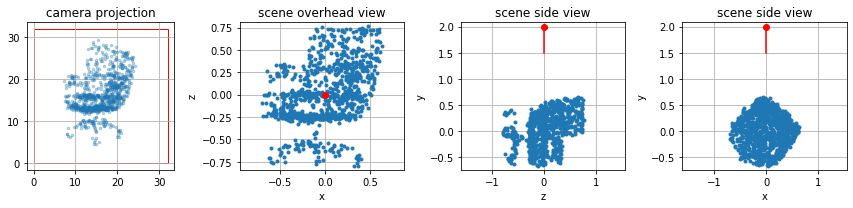

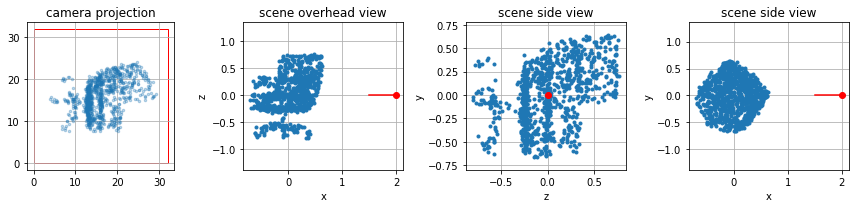

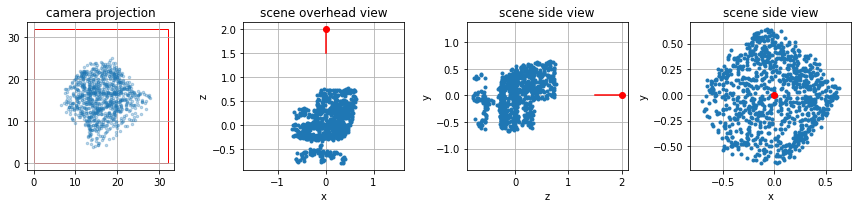

chair/train/chair_0369.off


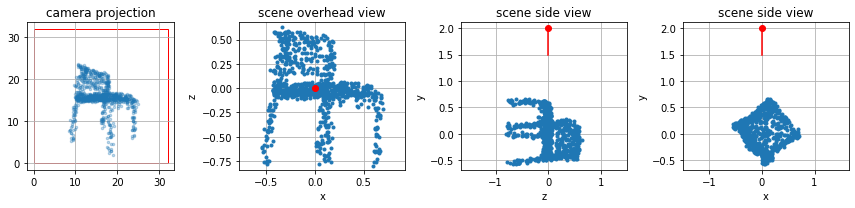

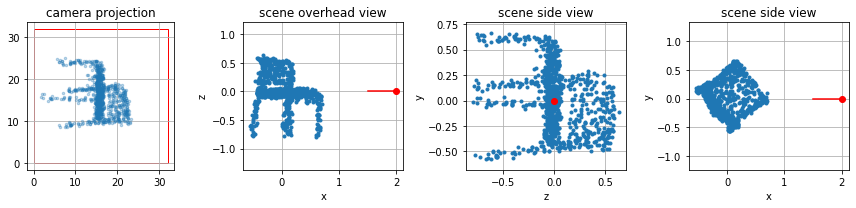

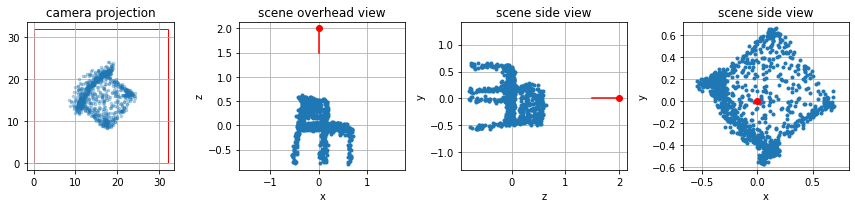

chair/train/chair_0466.off


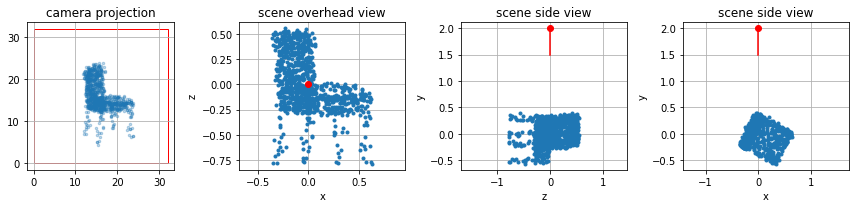

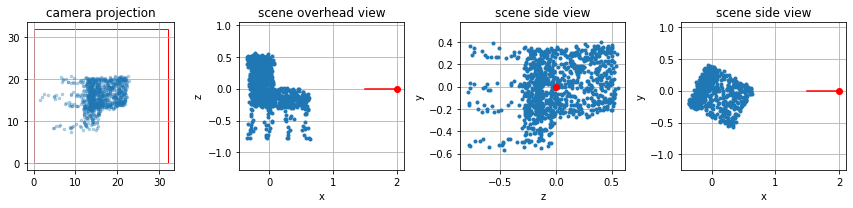

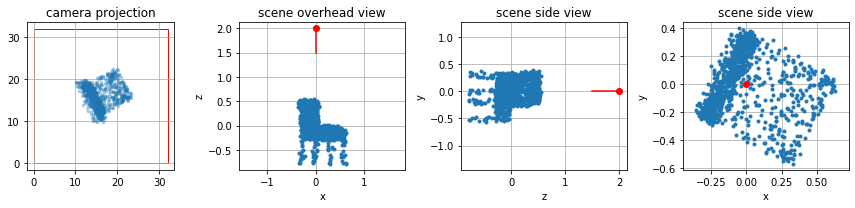

chair/train/chair_0186.off


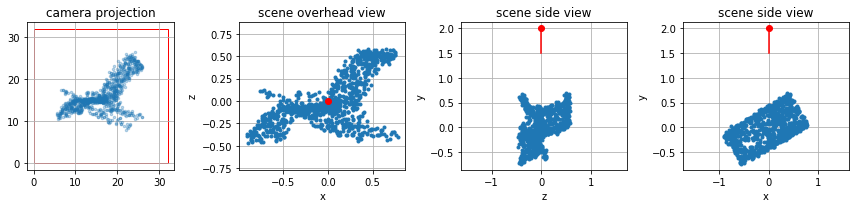

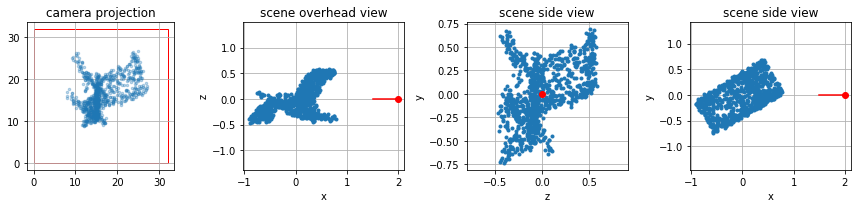

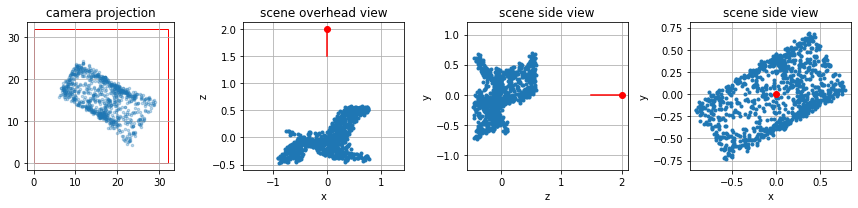

In [19]:
for i in range(10):
    file_name = "chair/train/chair_" + str(np.random.randint(1,889)).zfill(4) + ".off"
    print(file_name)
    pts3 = get_3d_points_with_noise(file_name)
    visual_2d(cam1, pts3)
    visual_2d(cam2, pts3)
    visual_2d(cam3, pts3)
    plt.show()

## if want to save the image

```
plt.axis('off')
plt.savefig("image.png", bbox_inches='tight')
```